In [1]:
import numpy as np
x_points = np.array([1,1,2,3,4,5,6,7,8,9,10,11]) 
y_points = np.array([1,2,3,1,4,5,6,4,7,10,15,9])

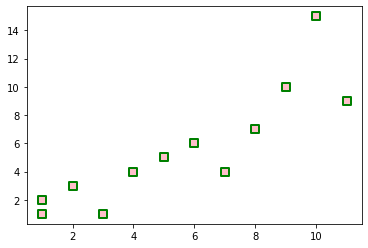

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x_points, y_points, c ="pink", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="green", 
            s = 50)
plt.show()

# Momenum Gradient Descent

In [3]:
from sklearn.metrics import r2_score
def momentumGD(x_points,y_points,epoch,alpha,epsilon):
    loss_list=[]
    epochs=[]
    theta0_list=[]
    theta1_list=[]
    theta0=0
    theta1=0
    theta=np.array([0,0])
    m=x_points.shape[0]
    mat_ones=np.ones(x_points.shape) #(13,)
    data=np.stack((mat_ones,x_points),axis=1)
    vprev=0
    for i in range(epoch): 
          y_pred=np.dot(data,theta)
          z=y_pred-y_points
          grad=(1/m)*np.dot(data.T,z)
          #print("grad",grad)
          vinit=vprev+np.square(grad)
         # print("vinit",vinit)
          lossfun=(1/(2*m))*(np.sum((y_pred-y_points)**2))
          loss_list.append(lossfun)
          epochs.append(i)
          theta=theta-np.divide(alpha*grad,np.sqrt(vinit)+epsilon)
        #  print("theta",theta)
          theta0_list.append(theta[0])
          theta1_list.append(theta[1])
          vprev=vinit
          if (np.linalg.norm(grad)<0.001):
                break
         # break
    theta0=theta[0]
    theta1=theta[1]
    print("accuracy=",r2_score(y_points,y_pred)*100,"%")
    print("theta 0",theta[0])
    print("theta 1",theta[1])
    return theta0,theta1,epochs,loss_list,theta0_list,theta1_list

In [4]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,7000,0.006,10**-9)

accuracy= 65.30792245416961 %
theta 0 0.7067551793026172
theta 1 0.7329362304655614


In [5]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,6000,0.006,10**-9)

accuracy= 61.44858515409128 %
theta 0 0.6792334901119965
theta 1 0.7001786571657646


In [6]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,7000,0.0061,10**-9)

accuracy= 66.01159258344613 %
theta 0 0.712219575704454
theta 1 0.739677313288379


In [7]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,7000,0.0064,10**-9)

accuracy= 67.83855474986157 %
theta 0 0.7272362720296137
theta 1 0.7587745412179325


In [8]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,7000,0.007,10**-9)

accuracy= 70.4406080528457 %
theta 0 0.751224297224767
theta 1 0.7920781382725071


In [9]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,7000,0.008,10**-9)

accuracy= 72.7020427656301 %
theta 0 0.7745901740172814
theta 1 0.8344296677647516


In [10]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,7000,0.01,10**-9)

accuracy= 73.96615216614113 %
theta 0 0.7724769970558624
theta 1 0.882143664265054


In [11]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,500,0.03,10**-9)

accuracy= 72.22716781034588 %
theta 0 0.7691365972335695
theta 1 0.8238163483634376


In [12]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,500,0.04,10**-9)

accuracy= 74.01020742807735 %
theta 0 0.7689759940059095
theta 1 0.885250820809157


In [13]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,600,0.05,10**-9)

accuracy= 74.42818253533507 %
theta 0 0.6770677702927619
theta 1 0.9141526360387425


In [14]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,900,0.05,10**-9)

accuracy= 74.72257772625802 %
theta 0 0.5728673275673709
theta 1 0.9294000255635426


In [15]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,2000,0.05,10**-9)

accuracy= 75.33791992450004 %
theta 0 0.28592198669038343
theta 1 0.9691265672836813


In [16]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=momentumGD(x_points,y_points,7000,0.05,10**-9)

accuracy= 75.74337156672037 %
theta 0 -0.14619665652139147
theta 1 1.0288056346324346


# rms prop

In [17]:
def RMSprop(x_points,y_points,epoch,alpha,beta,epsilon):
    loss_list=[]
    epochs=[]
    theta0_list=[]
    theta1_list=[]
    theta0=0
    theta1=0
    theta=np.array([0,0])
    m=x_points.shape[0]
    mat_ones=np.ones(x_points.shape) #(13,)
    data=np.stack((mat_ones,x_points),axis=1)
    vprev=0
    for i in range(epoch): 
          y_pred=np.dot(data,theta)
          z=y_pred-y_points
          grad=(1/m)*np.dot(data.T,z)
          #print("grad",grad)
        #  vinit=vprev+np.square(grad)
          vinit=beta*vprev+(1-beta)*np.square(grad)
         # print("vinit",vinit)
          lossfun=(1/(2*m))*(np.sum((y_pred-y_points)**2))
          loss_list.append(lossfun)
          epochs.append(i)
          theta=theta-np.divide(alpha*grad,np.sqrt(vinit)+epsilon)
        #  print("theta",theta)
          theta0_list.append(theta[0])
          theta1_list.append(theta[1])
          vprev=vinit
          if (np.linalg.norm(grad)<0.001):
                break
         # break
    theta0=theta[0]
    theta1=theta[1]
    print("accuracy=",r2_score(y_points,y_pred)*100,"%")
    print("theta 0",theta[0])
    print("theta 1",theta[1])
    return theta0,theta1,epochs,loss_list,theta0_list,theta1_list

In [18]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,10,0.001,0.9,10**-9)

accuracy= -188.2697836036656 %
theta 0 0.017272308698160474
theta 1 0.017275297843389294


In [19]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,10,0.01,0.9,10**-9)

accuracy= -110.97458029622045 %
theta 0 0.16690680512641437
theta 1 0.16725430470336372


In [20]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,100,0.01,0.9,10**-9)

accuracy= 73.49882789286872 %
theta 0 0.7999826386023577
theta 1 0.86267440173985


In [21]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,100,0.01,0.89,10**-9)

accuracy= 73.57488449197136 %
theta 0 0.8011718546667154
theta 1 0.8660029502129617


In [22]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,300,0.01,0.89,10**-9)

accuracy= 75.74158672045097 %
theta 0 -0.2045985586268756
theta 1 1.0425546347784684


In [23]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,400,0.01,0.85,10**-9)

accuracy= 75.74155947491195 %
theta 0 -0.2150310538299901
theta 1 1.0326175144279792


In [24]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,700,0.01,0.95,10**-9)

accuracy= 75.74155995287491 %
theta 0 -0.20503159344675076
theta 1 1.042617309506237


In [25]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,1000,0.0099,0.999,10**-9)

accuracy= 75.75018636560738 %
theta 0 -0.2071266473404233
theta 1 1.0372168438894158


In [26]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,2000,0.02,0.999,10**-8)

accuracy= 75.75018588852222 %
theta 0 -0.20712470953170073
theta 1 1.0372168100125756


In [27]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,2000,0.022,0.999,10**-8)

accuracy= 75.75018587980355 %
theta 0 -0.20713270832275948
theta 1 1.0372179537552513


In [28]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,2000,0.029,0.999,10**-8)

accuracy= 75.75018661903098 %
theta 0 -0.20723265170051983
theta 1 1.0372318677761756


In [29]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,2000,0.03,0.999,10**-8)

accuracy= 75.75018604052262 %
theta 0 -0.20717977887197803
theta 1 1.0372246019657336


In [30]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,2000,0.039,0.999,10**-8)

accuracy= 75.75018662132548 %
theta 0 -0.20725785533756513
theta 1 1.037235553948775


In [31]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=RMSprop(x_points,y_points,2000,0.1,0.999,10**-8)

accuracy= 75.75018629233743 %
theta 0 -0.20721867628940813
theta 1 1.0372305477799544


# Adam Optimizer

In [32]:
def adam(x_points,y_points,epoch,alpha,beta1,beta2,epsilon):
    loss_list=[]
    epochs=[]
    theta0_list=[]
    theta1_list=[]
    theta0=0
    theta1=0
    theta=np.array([0,0])
    m=x_points.shape[0]
    mat_ones=np.ones(x_points.shape) #(13,)
    data=np.stack((mat_ones,x_points),axis=1)
    vinit=0
    minit=0
    for i in range(epoch): 
          y_pred=np.dot(data,theta)
          z=y_pred-y_points
          grad=(1/m)*np.dot(data.T,z)
          #print("grad",grad)
        #  vinit=vprev+np.square(grad)
         # minit=beta1*mprev+(1-beta1)*grad
          minit=beta1*minit+(1-beta1)*grad
        #  vinit=beta*vprev+(1-beta)*np.square(grad)
          vinit=beta2*vinit+(1-beta2)*np.square(grad)
         # print("vinit",vinit)
          lossfun=(1/(2*m))*(np.sum((y_pred-y_points)**2))
          loss_list.append(lossfun)
          epochs.append(i)
          minit=np.divide(minit,1-(beta1**(i+1)))
          vinit=np.divide(vinit,1-(beta2**(i+1)))
          theta=theta-alpha*np.divide(minit,np.sqrt(vinit)+epsilon)
        #  print("theta",theta)
          theta0_list.append(theta[0])
          theta1_list.append(theta[1])
         # vprev=vupdated
          #mprev=mupdated
          if (np.linalg.norm(grad)<0.001):
                break
         # break
    theta0=theta[0]
    theta1=theta[1]
    print("accuracy=",r2_score(y_points,y_pred)*100,"%")
    print("theta 0",theta[0])
    print("theta 1",theta[1])
    return theta0,theta1,epochs,loss_list,theta0_list,theta1_list

In [33]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,20,0.04,0.9,0.9,0.0001)

accuracy= -183454.99369087792 %
theta 0 26.222858279931597
theta 1 26.29061949726999


In [34]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,30,0.001,0.9,0.9,0.0001)

accuracy= 36.727120668680925 %
theta 0 1.2673515297594462
theta 1 1.267360377118516


In [35]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,30,0.001,0.9,0.9,1e-8)

accuracy= 36.72709147958169 %
theta 0 1.2673520672004355
theta 1 1.2673604474242959


In [36]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,30,0.001,0.9,0.9,1e-9)

accuracy= 36.72709147695442 %
theta 0 1.2673520672488103
theta 1 1.267360447430624


In [37]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,30,0.05,0.9,0.99,1e-9)

accuracy= -124.05834438931333 %
theta 0 0.1301912605659928
theta 1 0.13021774433450636


In [38]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,30,0.1,0.9,0.99,1e-9)

accuracy= -62.27043245235897 %
theta 0 0.25930336701175755
theta 1 0.2594099082409686


In [39]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,30,0.26,0.9,0.99,1e-9)

accuracy= 56.86982667341623 %
theta 0 0.6651113556784226
theta 1 0.6658442390915625


In [40]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,30,0.29,0.9,0.99,1e-9)

accuracy= 66.37916398153155 %
theta 0 0.7399384821836741
theta 1 0.7408531065176831


In [41]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,30,0.299,0.9,0.99,1e-9)

accuracy= 68.46756990785629 %
theta 0 0.7623081835844755
theta 1 0.7632813630810811


In [42]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,50,0.299,0.9,0.99,1e-9)

accuracy= 68.46756991658674 %
theta 0 0.762308183634566
theta 1 0.7632813631313116


In [43]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,50,0.299,0.9,0.8,1e-9)

accuracy= -15845912.034803443 %
theta 0 203.82728557406344
theta 1 216.72670834750684


In [44]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,50,0.299,0.9,0.9,1e-8)

accuracy= -13737010.207443848 %
theta 0 192.92036997701706
theta 1 201.52235989872187


In [45]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,50,0.3,0.9,0.9,1e-8)

accuracy= -13776539.6148337 %
theta 0 193.18482722053156
theta 1 201.81171388894816


In [46]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list=adam(x_points,y_points,50,0.29,0.9,0.99,1e-9)

accuracy= 66.37916399155235 %
theta 0 0.7399384822323393
theta 1 0.7408531065664801
